

# Project: Investigate No_Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    **ScheduledDay: tells us on what day the patient set up their appointment.
    **Neighborhood: indicates the location of the hospital.
    **Scholarship :indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
 


### Question(s) for Analysis

**we will discover What factors from ('Age', 'being alcoholic','Having an SMS', 'Gender','Neighbourhood','Hipertension' 	'Diabetes', 'Scholarship','Handcap')are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [64]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

 check for cleanliness, and then trim and clean  dataset for analysis.


### General Properties


In [65]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()




,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



# Summary of data

In [66]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* it seems that there is non logic data like that patient has -1 year 

## No of patients and their Data

In [67]:
df.shape

(110527, 14)

# Checking for missing data

In [68]:
pd.isnull(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Inspect data & finding data TYPES and data that  need to be cleaned

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [70]:
df.duplicated().sum()

0

* no missing data

In [71]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [72]:
df[df["Age"]<=0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

### As above statistics :
* we have 110527 unique appointment ID & 0 Duplicated values 
* we have 3540 patient has age less than 0 thats illogical  , so these data need to be clenaed 
* there are typos mistakes in some columns name need to be editied 


### Data Cleaning


* After discussing the structure of the data and  problems that need to be cleaned, perform those cleaning steps. 
  * remove un-necessary data 
  * fixing typos
  * fixing age <= 0 poblem



drop un-necessary data that we won't use it in our analysis 

In [73]:
df.drop(['PatientId' , 'AppointmentID'], axis = 1 , inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.shape

(110527, 12)

* total columns decreased 2 that we dropped , new total columns 12.

### Fixing typos in columns name

In [74]:
df.rename(columns = {'ScheduledDay' : 'Scheduled_Day' ,'AppointmentDay' : 'Appointment_Day','Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## fixing the ages that are  <=  0 by replace values with nan

In [75]:
df['Age']=df['Age'].apply(lambda x : x if x > 0 else 0)

In [76]:
df['Age']=df['Age'].replace(0,np.nan)

In [77]:
df['Age'].isnull().sum()

3540

In [78]:
df.isnull().sum()

Gender                0
Scheduled_Day         0
Appointment_Day       0
Age                3540
Neighbourhood         0
Scholarship           0
Hypertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
No_show               0
dtype: int64

* after replacing illogical age values with nan , now we have 3540 null values

<a id='eda'></a>
## Exploratory Data Analysis



# discover a general insights of all dataset

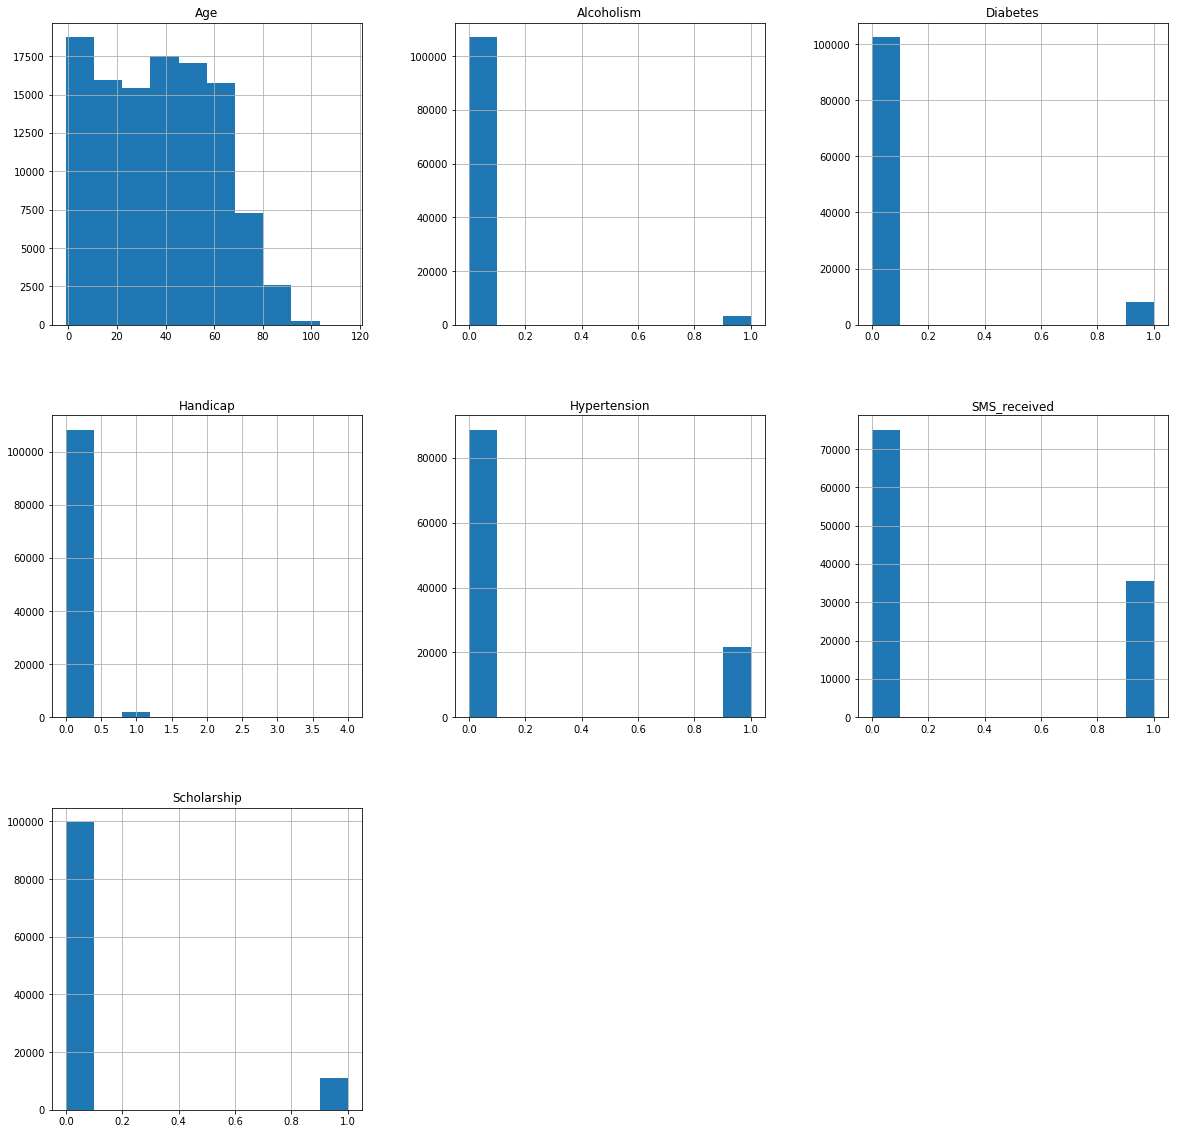

In [18]:
df.hist(figsize= (20,20));

some insights  of above histograms
* most of patients non alcohlic
* most of patients non Handicap
* the rest of data will be shown in pie charts below to display % of each characteristic separetly

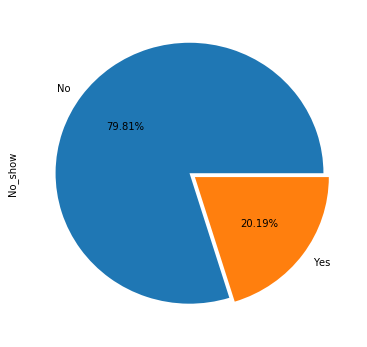

In [19]:
df.No_show.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [79]:
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

In [80]:
df[show].count()

Gender             88208
Scheduled_Day      88208
Appointment_Day    88208
Age                85307
Neighbourhood      88208
Scholarship        88208
Hypertension       88208
Diabetes           88208
Alcoholism         88208
Handicap           88208
SMS_received       88208
No_show            88208
dtype: int64

In [81]:
df[noshow].count()

Gender             22319
Scheduled_Day      22319
Appointment_Day    22319
Age                21680
Neighbourhood      22319
Scholarship        22319
Hypertension       22319
Diabetes           22319
Alcoholism         22319
Handicap           22319
SMS_received       22319
No_show            22319
dtype: int64


   * 79.8% showed
   * 20.2% noshowed



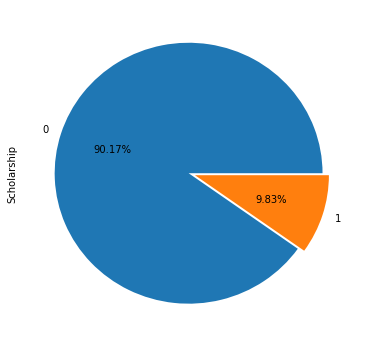

In [23]:
df.Scholarship.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

* 90% don't have scolarship

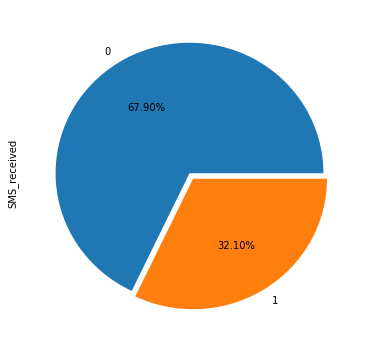

In [24]:
df.SMS_received.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

* 67.9% didn't receive sms

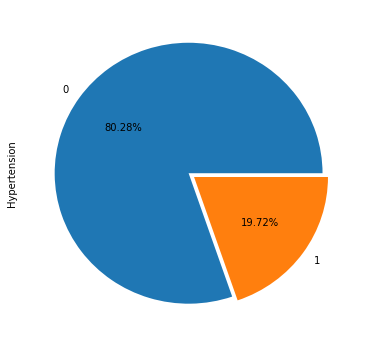

In [25]:
df.Hypertension.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

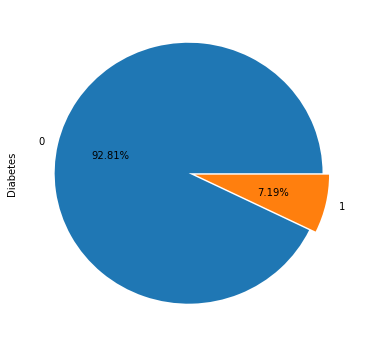

In [26]:
df.Diabetes.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

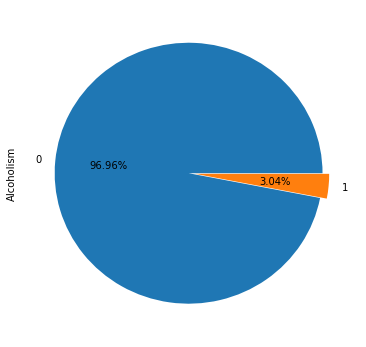

In [27]:
df.Alcoholism.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

* most of patients don't alcohlic and aren't suffering from hypertension & diabtetes

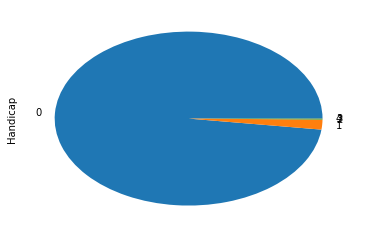

In [28]:
df.Handicap.value_counts(sort=False).plot.pie()
plt.show()

* most of patients aren't Handicap

### Research Question 2  (Replace this header name!)

# Go in depth to find the relation between each characteristcs with No_show column data


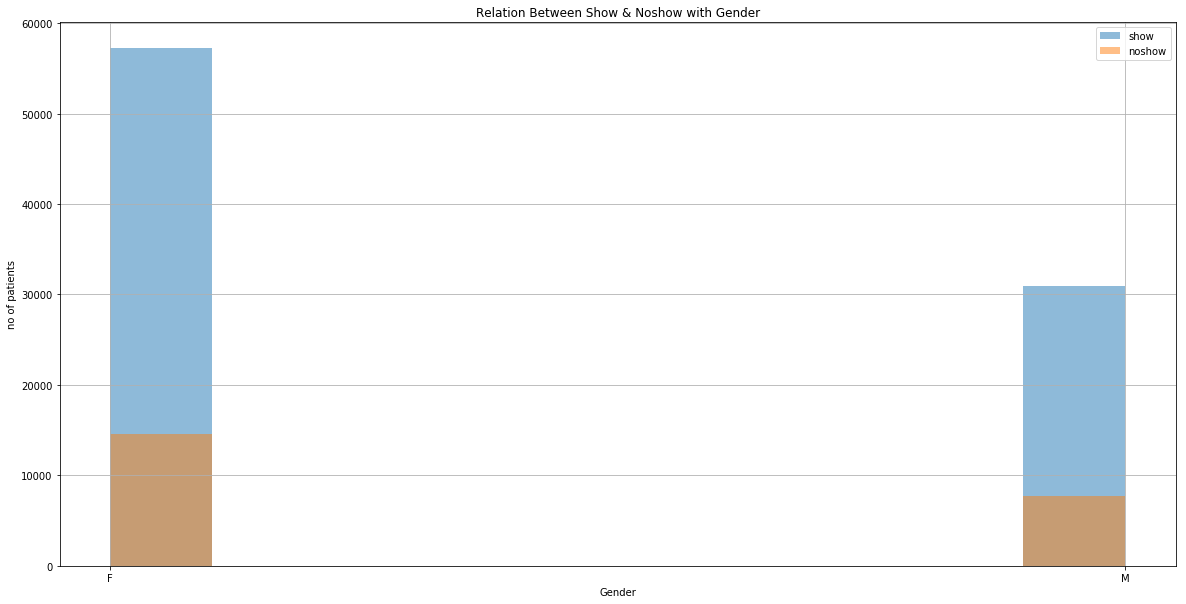

In [82]:
plt.figure(figsize=[20 , 10])
df.Gender[show].hist(alpha = 0.5,label = 'show')
df.Gender[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Gender')
plt.xlabel('Gender')
plt.ylabel('no of patients');


In [83]:
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


## Gender is insignificant

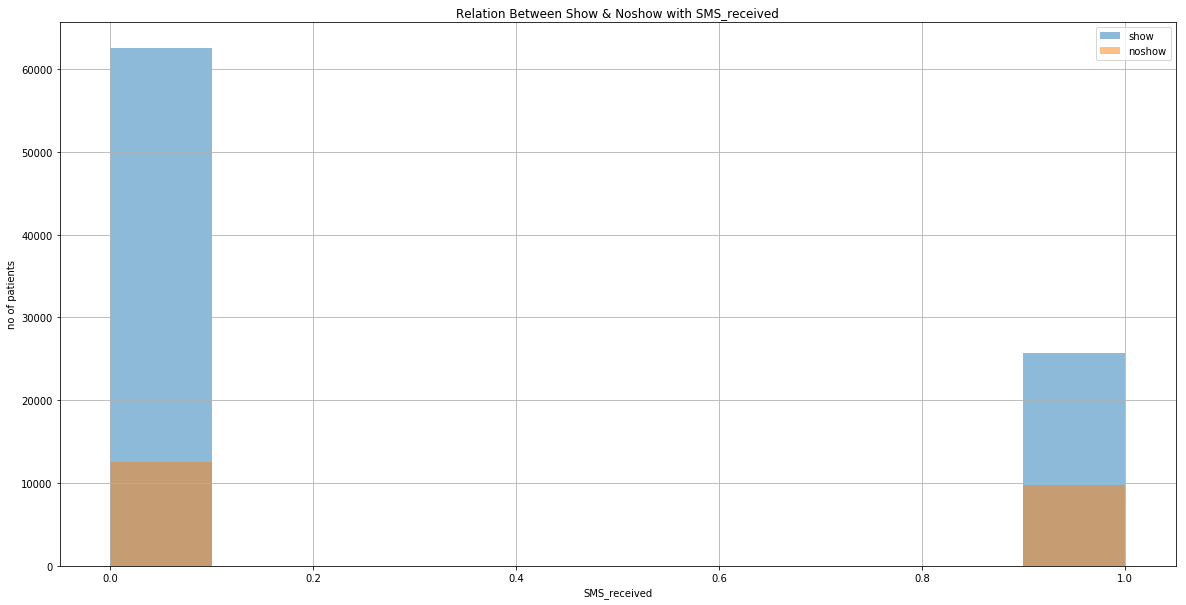

In [84]:
plt.figure(figsize=[20 , 10])
df.SMS_received[show].hist(alpha = 0.5,label = 'show')
df.SMS_received[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('no of patients');

In [85]:
print(df.SMS_received[show].value_counts())
print(df.SMS_received[noshow].value_counts())

0    62510
1    25698
Name: SMS_received, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


* above analysis shows something weird .. it shows that patients who didn't receive any sms were showed more than didint't , that need more investigation 

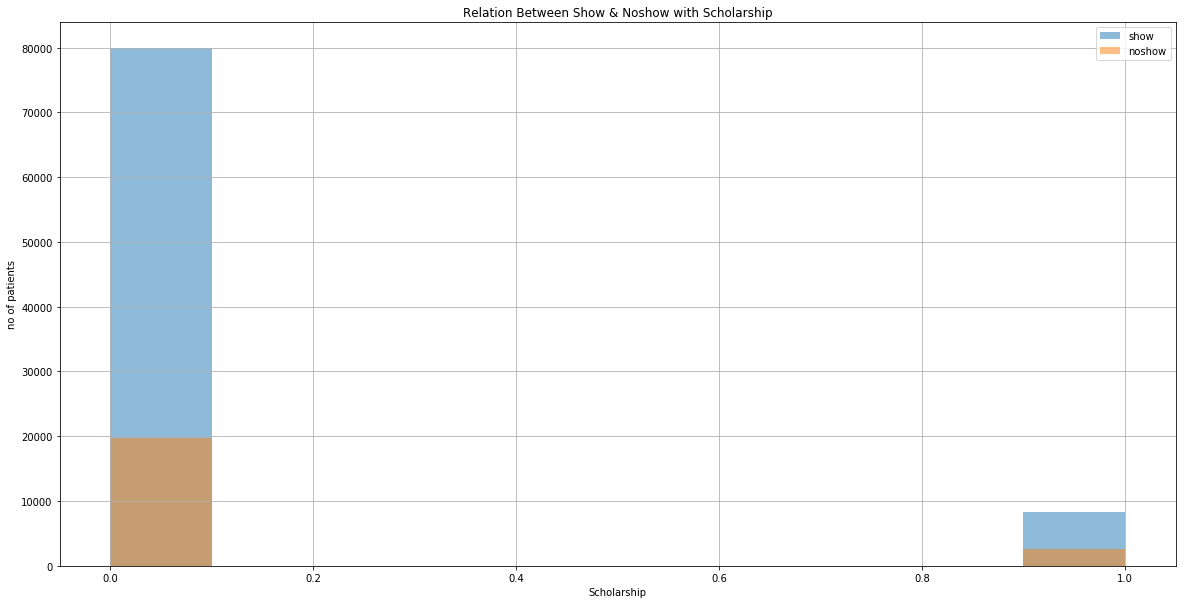

In [86]:
plt.figure(figsize=[20 , 10])
df.Scholarship[show].hist(alpha = 0.5,label = 'show')
df.Scholarship[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('no of patients');

### Being enrolled in scolarship is insignificant

In [87]:
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


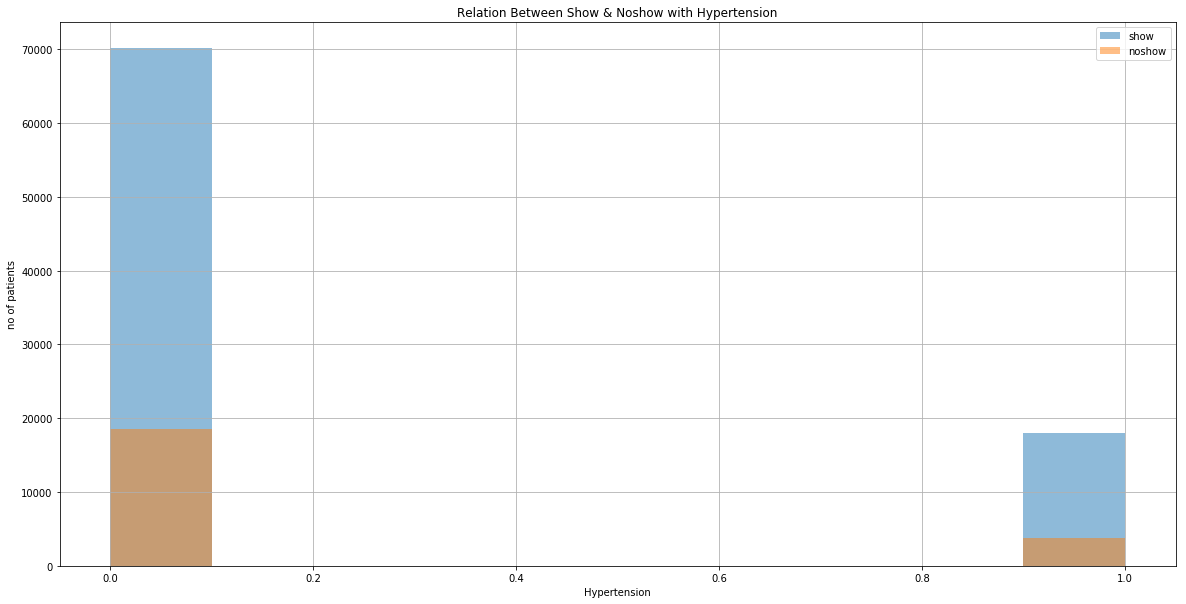

In [88]:
plt.figure(figsize=[20 , 10])
df.Hypertension[show].hist(alpha = 0.5,label = 'show')
df.Hypertension[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('no of patients');

In [89]:
print(df.Hypertension[show].value_counts())
print(df.Hypertension[noshow].value_counts())

0    70179
1    18029
Name: Hypertension, dtype: int64
0    18547
1     3772
Name: Hypertension, dtype: int64


## Hypertension is insignificant 

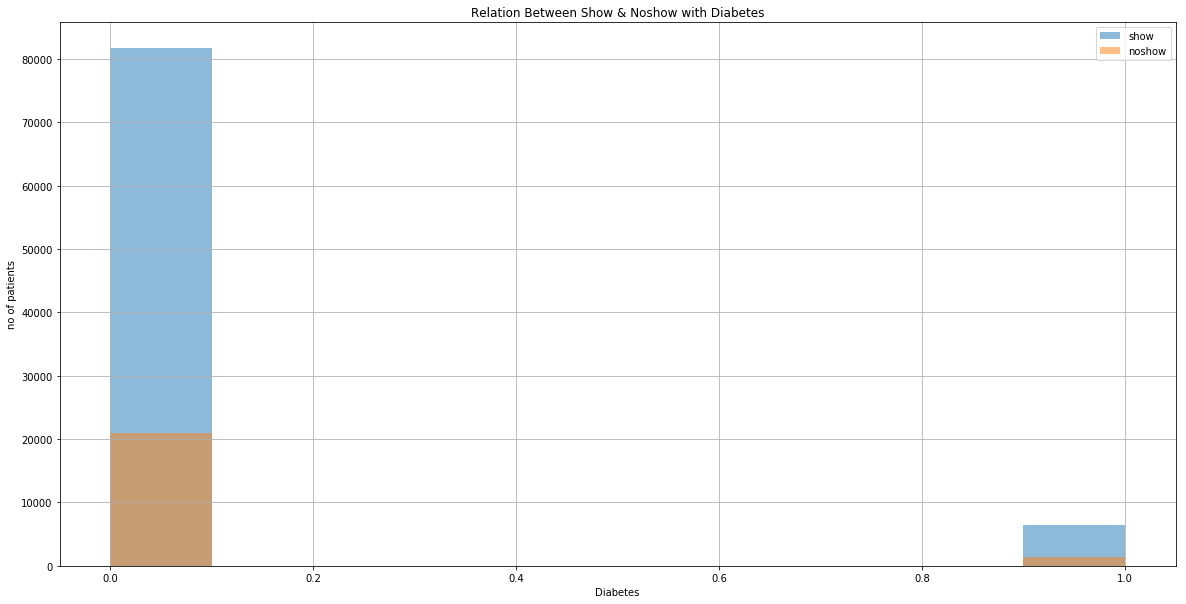

In [90]:
plt.figure(figsize=[20 , 10])
df.Diabetes[show].hist(alpha = 0.5,label = 'show')
df.Diabetes[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('no of patients');

In [91]:
print(df.Diabetes[show].value_counts())
print(df.Diabetes[noshow].value_counts())

0    81695
1     6513
Name: Diabetes, dtype: int64
0    20889
1     1430
Name: Diabetes, dtype: int64


## Diabetes is insignificant

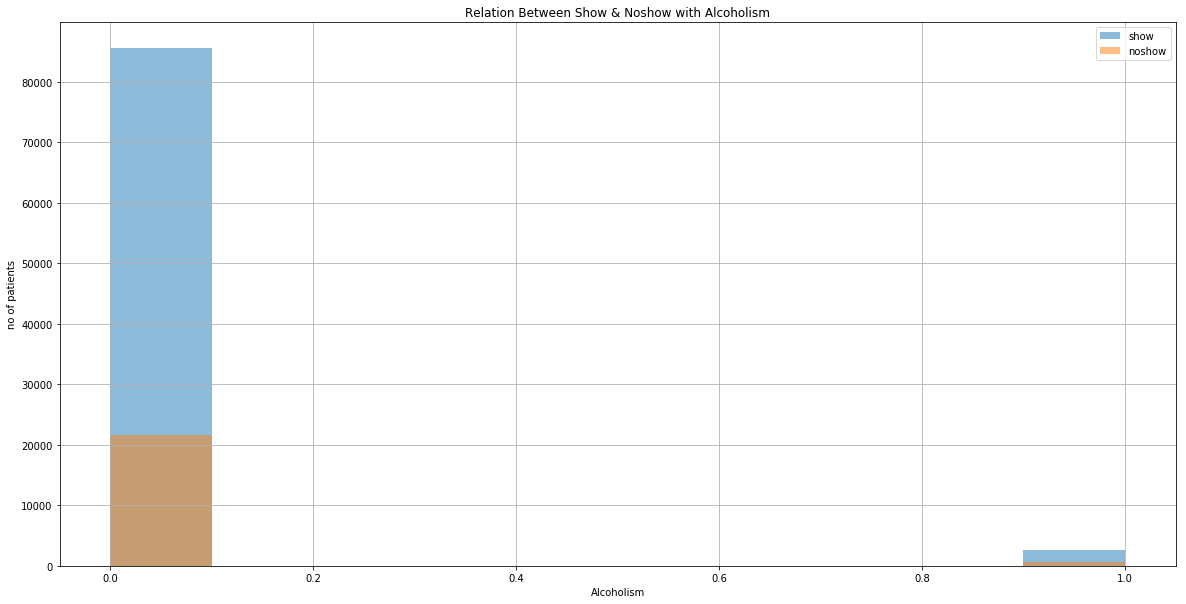

In [94]:
plt.figure(figsize=[20 , 10])
df.Alcoholism[show].hist(alpha = 0.5,label = 'show')
df.Alcoholism[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('no of patients');

In [95]:
print(df.Alcoholism[show].value_counts())
print(df.Alcoholism[noshow].value_counts())

0    85525
1     2683
Name: Alcoholism, dtype: int64
0    21642
1      677
Name: Alcoholism, dtype: int64


## Alcoholism is insignificant

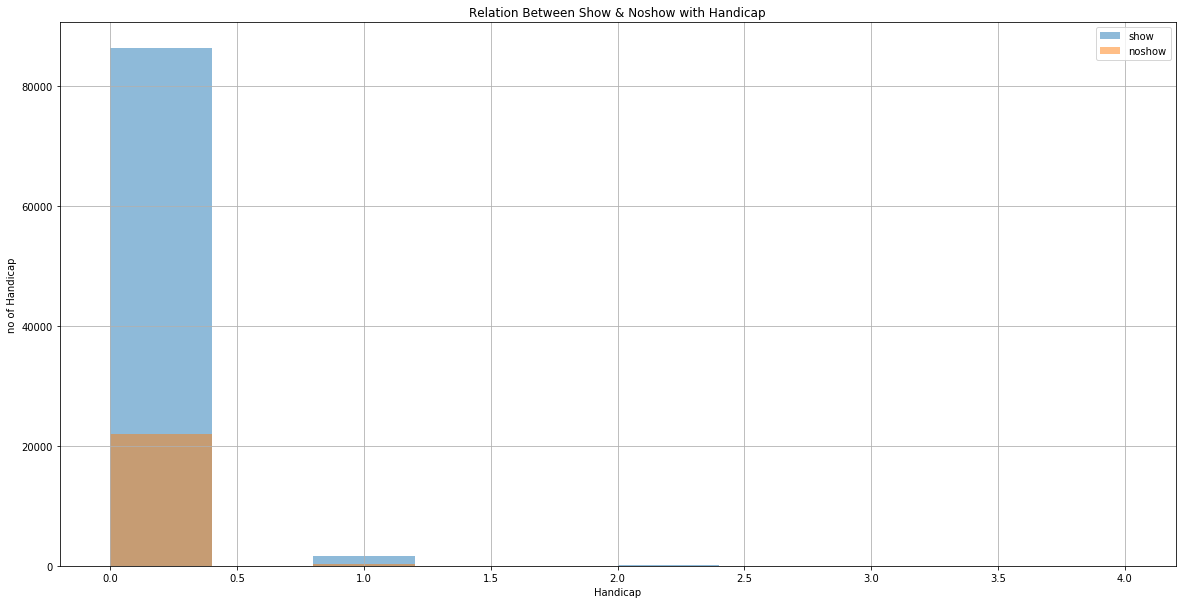

In [98]:
plt.figure(figsize=[20 , 10])
df.Handicap[show].hist(alpha = 0.5,label = 'show')
df.Handicap[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Handicap')
plt.xlabel('Handicap')
plt.ylabel('no of Handicap');

In [97]:
print(df.Handicap[show].value_counts())
print(df.Handicap[noshow].value_counts())

0    86374
1     1676
2      146
3       10
4        2
Name: Handicap, dtype: int64
0    21912
1      366
2       37
3        3
4        1
Name: Handicap, dtype: int64


## Handicap is insignificant

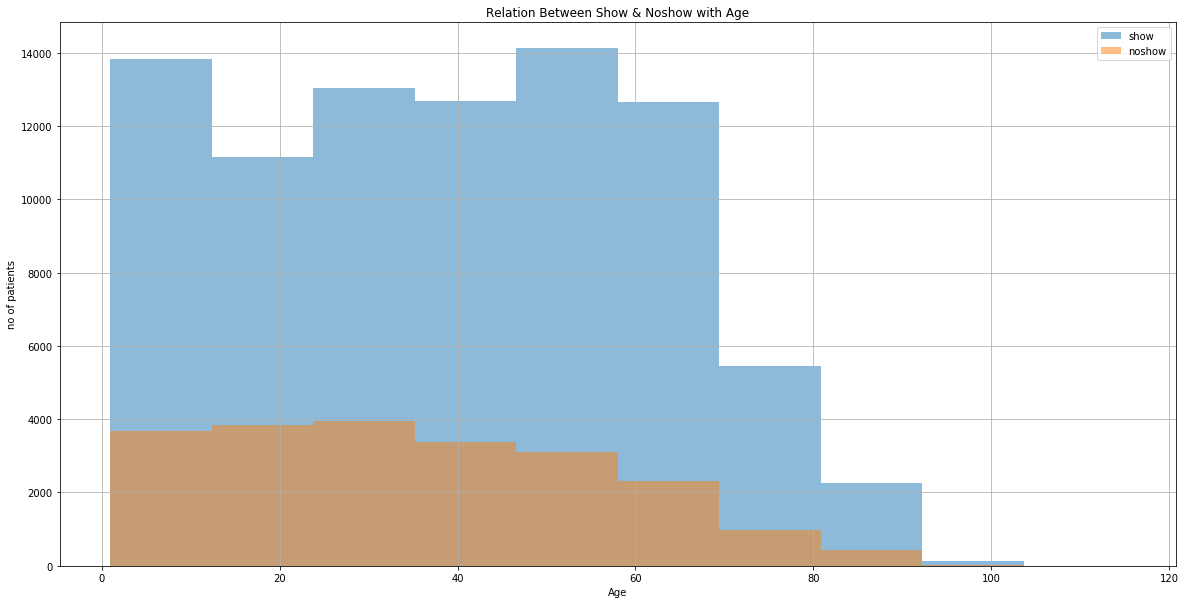

In [99]:
plt.figure(figsize=[20 , 10])
df.Age[show].hist(alpha = 0.5,label = 'show')
df.Age[noshow].hist(alpha = 0.5,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Age')
plt.xlabel('Age')
plt.ylabel('no of patients');

In [45]:
print(df.Age[show].value_counts())
print(df.Age[noshow].value_counts())


 0      2900
 1      1858
 52     1449
 56     1372
 2      1366
 59     1357
 49     1354
 53     1332
 57     1325
 50     1322
 38     1309
 51     1284
 54     1262
 36     1236
 3      1236
 58     1216
 37     1216
 6      1205
 34     1204
 45     1198
 39     1196
 63     1195
 46     1177
 33     1176
 60     1175
 32     1174
 5      1169
 55     1168
 44     1164
 30     1152
        ... 
 74      513
 76      480
 75      463
 78      452
 77      448
 80      430
 81      371
 79      329
 82      326
 84      276
 85      226
 83      219
 86      218
 87      157
 89      144
 88      114
 90       86
 92       66
 91       53
 93       43
 94       27
 95       18
 96       16
 97        9
 98        5
 100       4
 115       2
 102       2
-1         1
 99        1
Name: Age, Length: 104, dtype: int64
0      639
1      415
17     396
19     394
30     369
9      364
20     355
21     355
16     353
25     352
22     351
18     350
33     348
36     344
23     343
39   

## According to above histogram , Age is the most factor that affect on attending patients or not!

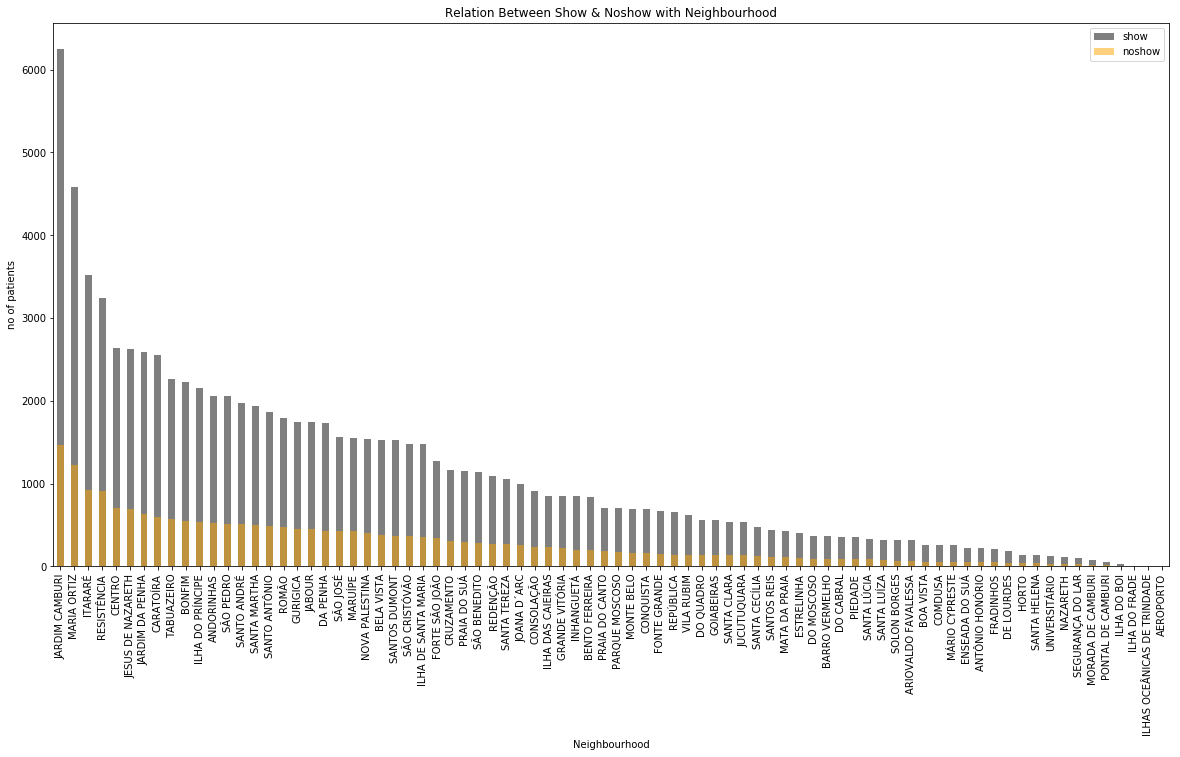

In [100]:
plt.figure(figsize=[20 , 10])
df.Neighbourhood[show].value_counts().plot(kind = 'bar', alpha = 0.5,color = 'black' ,label = 'show')
df.Neighbourhood[noshow].value_counts().plot(kind = 'bar', alpha = 0.5,color = 'orange' ,label = 'noshow')
plt.legend()
plt.title('Relation Between Show & Noshow with Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('no of patients');

## According to above graph , there are astrong affect of  Neighbourhood on showing patients 

## Conclusions

* there are 2 characteristics affecting strongly on data" Age" & "Neighbourhood"
* sending sms is doesn't affect on coming of patients to their appointments , maybe content of msg need to be change to affect positivly  
* scholarship is doesn't affect on coming of patients to their appointments which is strange , may be scolarship system need to be upgrade (need more investigation )
* the following factors  in dataset are  insignificant (Gender , Hypertension ,Diabete ,Alcoholism,	Handicap)




### Limitations
* dataset is not suffecient to analyse the whole sitation , it is missed many important factors , like the patients' medical history , social class , social status , professional status 

* dataset have illogical data like age in minus and zero which is does'nt make sens

In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0